# 텐서플로 시작하기

## 상수 텐서와 변수

In [6]:
import tensorflow as tf
import numpy as np

In [3]:
# 모두 1 또는 0인 텐서
x = tf.ones(shape = (2, 1))
print(x)

x = tf.zeros(shape = (2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [5]:
# 랜덤 텐서
x = tf.random.normal(shape = (3, 1), mean = 0, stddev = 1)
print(x)

x = tf.random.uniform(shape = (3, 1), minval = 0, maxval= 1)
print(x)

tf.Tensor(
[[-0.09817437]
 [ 0.271745  ]
 [-0.42499426]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.9570458 ]
 [0.9684441 ]
 [0.13380218]], shape=(3, 1), dtype=float32)


In [8]:
# 넘파이 배열에 값 할당하기
x = np.ones(shape = (2, 1))
x[0, 0] = 0
x

array([[0.],
       [1.]])

In [9]:
# 텐서플로 텐서에는 값을 할당하지 못한다.
x = tf.ones(shape = (2, 1))
x[0, 0] = 0.

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [10]:
# 텐서플로 변수 만들기
v = tf.Variable(initial_value = tf.random.normal(shape = (3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.15931413],
       [ 0.12317395],
       [-0.69024724]], dtype=float32)>


In [12]:
# 텐서플로 변수에 값 할당하기
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [13]:
# 변수 일부에 값 할당하기
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [15]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[5.],
       [3.],
       [3.]], dtype=float32)>

## 텐서 연산 : 텐서플로에서 수학 계산하기

In [17]:
# 기본적인 수학 연산
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e += d
print(a)
print(b)
print(c)
print(d)
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


## Gradient API

In [21]:
#GradientTape 사용하기
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [23]:
# 상수 텐서 입력과 함꼐 GradientTape 사용하기
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [26]:
# GradientTape를 중첩하여 이계도 Gradient 계산하기
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
accelaration = outer_tape.gradient(speed, time)
print(speed)
print(accelaration)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


## 엔드-투-엔드 예제 : 텐서플로 선형 분류기

In [34]:
# 2D 평면에 두 클래스의 랜덤한 포인트 생성하기
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0, 3],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class)
print(negative_samples.shape, positive_samples.shape)

(1000, 2) (1000, 2)


In [33]:
# 두 클래스를 (2000, 2) 크기의 한 배열로 쌓기
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs.shape

(2000, 2)

In [35]:
# (0과 1로 구성된) 타깃 생성하기
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), 
                    np.ones((num_samples_per_class, 1), dtype = "float32")))
targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

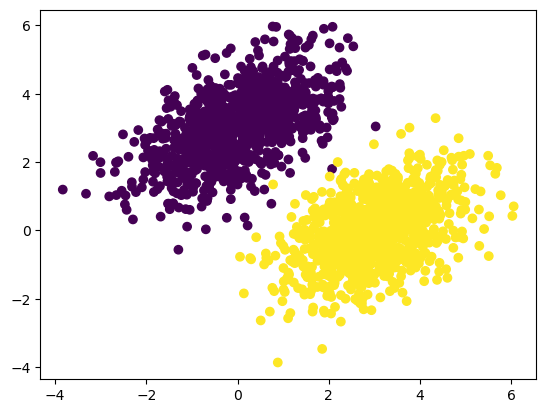

In [52]:
# 두 클래스의 포인트를 그래프로 그리기
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c = targets[:, 0])
plt.show()

In [37]:
# 선형 분류기의 변수 만들기
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value = tf.random.uniform(shape = (input_dim, output_dim)))
b = tf.Variable(initial_value= tf.zeros(shape = (output_dim, )))

In [48]:
# 정방향 패스 함수
def model(inputs):
    return tf.matmul(inputs, W) + b

# 평균 제곱 오차 손실 함수
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

# 훈련 스텝 함수
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate) # W.assign_sub = W - grad_loss_wrt_W * learning_rate
    b.assign_sub(grad_loss_wrt_b * learning_rate) # b.assign_sub = W - grad_loss_wrt_b * learning_rate
    return loss

In [49]:
# 배치 훈련 루프
for step in range(40):
    loss = training_step(inputs, targets)
    print(f'{step}번째 스텝의 손실 : {loss:.4f}')

0번째 스텝의 손실 : 0.4542
1번째 스텝의 손실 : 0.1002
2번째 스텝의 손실 : 0.0860
3번째 스텝의 손실 : 0.0797
4번째 스텝의 손실 : 0.0746
5번째 스텝의 손실 : 0.0702
6번째 스텝의 손실 : 0.0661
7번째 스텝의 손실 : 0.0624
8번째 스텝의 손실 : 0.0590
9번째 스텝의 손실 : 0.0560
10번째 스텝의 손실 : 0.0532
11번째 스텝의 손실 : 0.0506
12번째 스텝의 손실 : 0.0483
13번째 스텝의 손실 : 0.0462
14번째 스텝의 손실 : 0.0443
15번째 스텝의 손실 : 0.0425
16번째 스텝의 손실 : 0.0409
17번째 스텝의 손실 : 0.0395
18번째 스텝의 손실 : 0.0382
19번째 스텝의 손실 : 0.0369
20번째 스텝의 손실 : 0.0359
21번째 스텝의 손실 : 0.0349
22번째 스텝의 손실 : 0.0339
23번째 스텝의 손실 : 0.0331
24번째 스텝의 손실 : 0.0324
25번째 스텝의 손실 : 0.0317
26번째 스텝의 손실 : 0.0310
27번째 스텝의 손실 : 0.0305
28번째 스텝의 손실 : 0.0300
29번째 스텝의 손실 : 0.0295
30번째 스텝의 손실 : 0.0290
31번째 스텝의 손실 : 0.0287
32번째 스텝의 손실 : 0.0283
33번째 스텝의 손실 : 0.0280
34번째 스텝의 손실 : 0.0277
35번째 스텝의 손실 : 0.0274
36번째 스텝의 손실 : 0.0272
37번째 스텝의 손실 : 0.0269
38번째 스텝의 손실 : 0.0267
39번째 스텝의 손실 : 0.0265


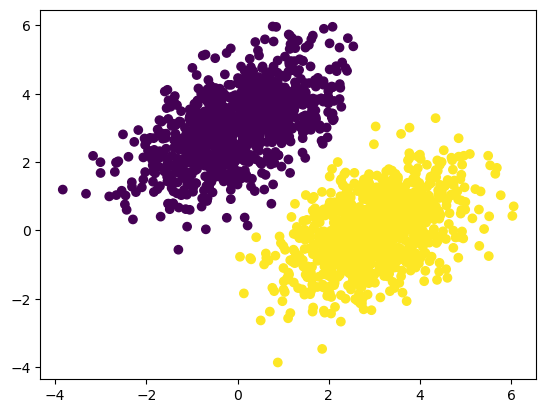

In [59]:
# 예측한 타겟을 시각화
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0]  > 0.5)
plt.show()

In [62]:
W

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.17090778],
       [-0.12675716]], dtype=float32)>

In [63]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.41636917], dtype=float32)>

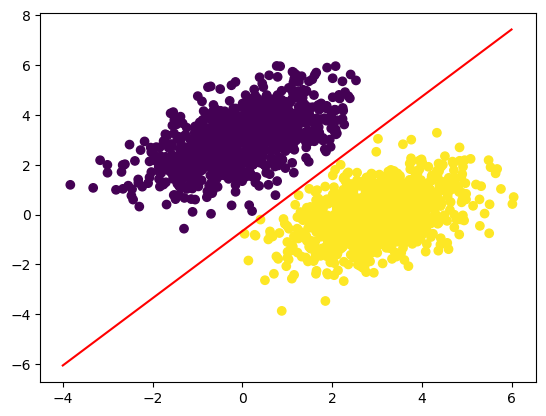

In [65]:
x = np.linspace(-4, 6, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)
plt.show()

# 신경망의 구조 : 핵심 Keras API 이해하기